# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [1]:
#In the dataset StateEnergyData:
    #WHAT - Energy Used per state per year
    #WHO - Each Individual State
    #HOW - Tracking the capacity during summer and the max capacity they can produce


# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [5]:
df = pd.read_csv("StateEnergyData.csv")
print(df.head())

  Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  \
0                                               Year                                                
1                                               2003                                                
2                                               2003                                                
3                                               2003                                                
4                                               2003                                                

  Unnamed: 1                                 Unnamed: 2   Unnamed: 3  \
0      State                               ProducerType   FuelSource   
1         AK  Combined Heat and Power, Commercial Power  All Sources   
2         AK  Combined Heat and Power, Commercial Power         Coal   
3         AK  Combined Heat and Power, Commercial Power    Petroleum   
4         AK    Combined Heat and

In [6]:
dw = df.describe()
print(dw.describe())

        Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  \
count                                                   4                                                 
unique                                                  4                                                 
top                                                 35994                                                 
freq                                                    1                                                 

        Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  
count            4           4           4           4           4  
unique           4           4           4           4           4  
top          35994       35994       35987       35994       35994  
freq             1           1           1           1           1  


In [9]:
dt = df.info()
print (dt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 6 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  35994 non-null  object
 1   Unnamed: 1                                                                                       35994 non-null  object
 2   Unnamed: 2                                                                                       35994 non-null  object
 3   Unnamed: 3                                                                                       35987 non-null  object
 4   Unnamed: 4                                                                                       35994 non-null  object
 5   Unnamed: 5  

In [10]:
duplicate_rows = df.duplicated()
print(duplicate_rows)
num_duplicates = duplicate_rows.sum()
print(f"{num_duplicates} rows are duplicated")

0        False
1        False
2        False
3        False
4        False
         ...  
35989    False
35990    False
35991    False
35992    False
35993    False
Length: 35994, dtype: bool
0 rows are duplicated


In [11]:
for col in df.columns:
    print(f"\nMode for {col}:")
    print(df[col].mode())


Mode for Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023:
0    2023
Name: Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023, dtype: object

Mode for Unnamed: 1:
0    US
Name: Unnamed: 1, dtype: object

Mode for Unnamed: 2:
0    Total Electric Power Industry
Name: Unnamed: 2, dtype: object

Mode for Unnamed: 3:
0    All Sources
Name: Unnamed: 3, dtype: object

Mode for Unnamed: 4:
0    2.0
Name: Unnamed: 4, dtype: object

Mode for Unnamed: 5:
0    1.0
Name: Unnamed: 5, dtype: object


In [12]:
# Calculate mean for all columns
mean_values = df.mean(numeric_only=True)
print("Mean values:")
print(mean_values)

# Calculate median for all columns
median_values = df.median(numeric_only=True)
print("\nMedian values:")
print(median_values)

# Calculate mode for all columns
mode_values = df.mode()
print("\nMode values:")
print(mode_values)

Mean values:
Series([], dtype: float64)

Median values:
Series([], dtype: float64)

Mode values:
  Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  \
0                                               2023                                                

  Unnamed: 1                     Unnamed: 2   Unnamed: 3 Unnamed: 4 Unnamed: 5  
0         US  Total Electric Power Industry  All Sources        2.0        1.0  


In [13]:
# Get all statistics at once
summary_stats = df.describe()
print(summary_stats)

# Or create your own summary
summary = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Mode': df.mode().iloc[0]  # Gets first mode if multiple exist
})
print(summary)

       Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  \
count                                               35994                                                
unique                                                 22                                                
top                                                  2023                                                
freq                                                 1883                                                

       Unnamed: 1                     Unnamed: 2   Unnamed: 3 Unnamed: 4  \
count       35994                          35994        35987      35994   
unique         53                              9           15      11242   
top            US  Total Electric Power Industry  All Sources        2.0   
freq         1470                          10357         6033        499   

       Unnamed: 5  
count       35994  
unique      12327  
top           1.0  
freq    

In [14]:
print(df.iloc[0:20, 0:10])

   Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023  \
0                                                Year                                                
1                                                2003                                                
2                                                2003                                                
3                                                2003                                                
4                                                2003                                                
5                                                2003                                                
6                                                2003                                                
7                                                2003                                                
8                                                2003                             

In [15]:
#null values
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)
#percentage of null
null_percentages = (df.isnull().sum()/len(df))*100
print("\nPercentage of null values in each column:")
print(null_percentages)
#fill null values with mean for numeric column
df_filled = df.fillna(df.mean(numeric_only=True))

Number of null values in each column:
Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023    0
Unnamed: 1                                                                                         0
Unnamed: 2                                                                                         0
Unnamed: 3                                                                                         7
Unnamed: 4                                                                                         0
Unnamed: 5                                                                                         0
dtype: int64

Percentage of null values in each column:
Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023    0.000000
Unnamed: 1                                                                                         0.000000
Unnamed: 2                                                                          

In [16]:
remaining_nulls = df.isnull().sum()
print("\nReamaning null values after filling:")
print(remaining_nulls)


Reamaning null values after filling:
Existing Nameplate and Net Summer Capacity by Energy Source, Producer Type and State, 2003-2023    0
Unnamed: 1                                                                                         0
Unnamed: 2                                                                                         0
Unnamed: 3                                                                                         7
Unnamed: 4                                                                                         0
Unnamed: 5                                                                                         0
dtype: int64


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [17]:
#the data is usable. What we need to modify from it are the headers so that at the moment of running the program to gather information about the data
#it easier for code to identify rows and columns

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

<Figure size 1200x800 with 0 Axes>

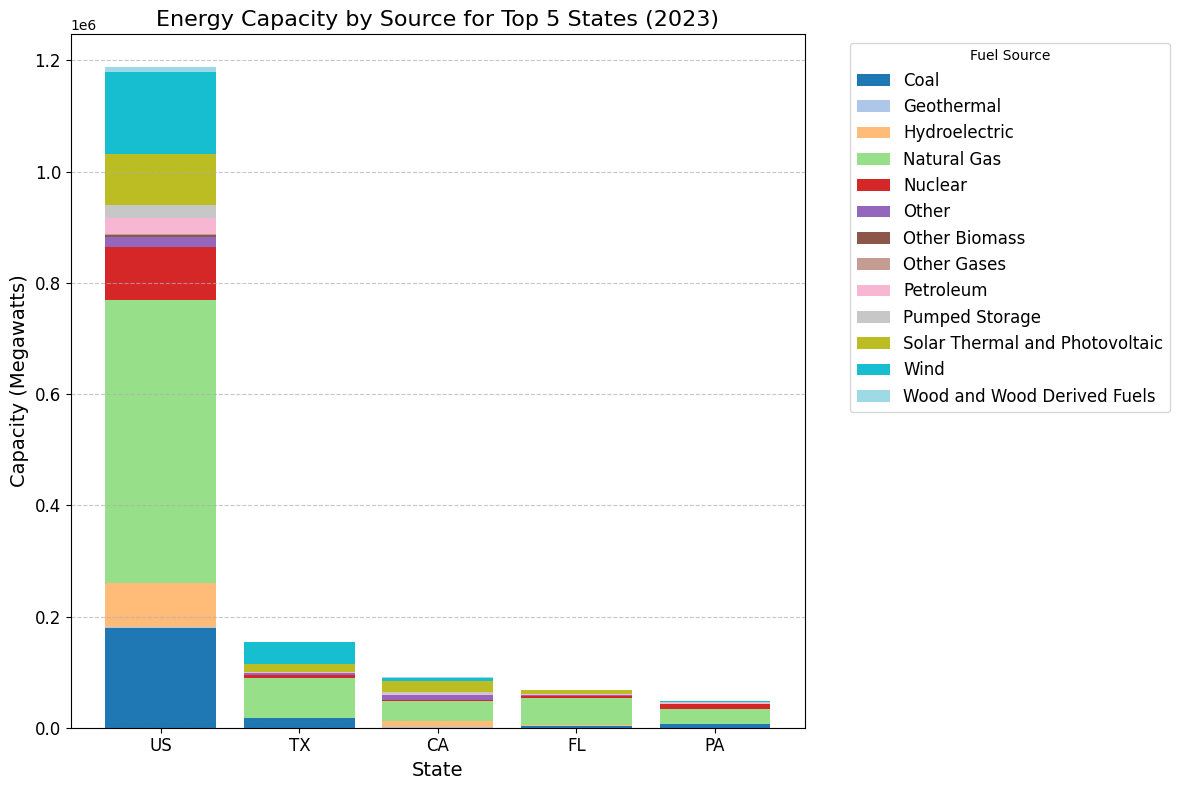

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load the data using csv module to properly handle quoted fields containing commas
with open('StateEnergyData.csv', 'r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)

# Extract the actual header from the second row
header = data[1]

# Create DataFrame with proper columns, skipping the first row and header row
df = pd.DataFrame(data[2:], columns=header)

# Clean column names
df.columns = ['Year', 'State', 'ProducerType', 'FuelSource', 
              'Nameplate_Capacity_MW', 'Summer_Capacity_MW']

# Function to clean and convert capacity values
def clean_capacity(value):
    if pd.isna(value) or value is None:
        return np.nan
    
    # Convert to string for consistent handling
    value_str = str(value).strip()
    
    # Check for empty or problematic values
    if value_str == '' or value_str == '.' or value_str == '-' or value_str == ' ':
        return np.nan
    
    # Remove commas and try to convert to float
    try:
        return float(value_str.replace(',', ''))
    except ValueError:
        return np.nan

# Apply data cleaning
df['Summer_Capacity_MW'] = df['Summer_Capacity_MW'].apply(clean_capacity)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter to 2023 data for Total Electric Power Industry, excluding All Sources
data = df[(df['Year'] == 2023) & 
          (df['ProducerType'] == 'Total Electric Power Industry') & 
          (df['FuelSource'] != 'All Sources')]

# Remove any rows with NaN capacity values
data = data.dropna(subset=['Summer_Capacity_MW'])

# Get top 5 states by total capacity
state_totals = data.groupby('State')['Summer_Capacity_MW'].sum()
top_states = state_totals.nlargest(5).index.tolist()

# Filter to top states only
top_data = data[data['State'].isin(top_states)]

# Create pivot table for plotting
plot_data = top_data.pivot_table(index='State', 
                                 columns='FuelSource', 
                                 values='Summer_Capacity_MW', 
                                 aggfunc='sum').fillna(0)

# Reorder states by total capacity
plot_data = plot_data.reindex(top_states)

# Create stacked bar chart
plt.figure(figsize=(12, 8))
ax = plot_data.plot(kind='bar', stacked=True, figsize=(12, 8), 
                    colormap='tab20', width=0.8)

# Customize chart
plt.title('Energy Capacity by Source for Top 5 States (2023)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Capacity (Megawatts)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Fuel Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('state_energy_capacity.png', dpi=300, bbox_inches='tight')
plt.show()